In [1]:
%matplotlib inline

# NLTK 자연어 처리 패키지

In [1]:
import nltk

# 말뭉치

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

# 토큰 생성

In [14]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [15]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [16]:
from nltk.tokenize import RegexpTokenizer
t = RegexpTokenizer("[\w]+")
t.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## tokenizer 함수
 - 문자열을 받아서 문자열 token의 list를 출력
 - list안의 문자는 token을 의미

# 형태소 분석(morpheme)

## 어간 추출(stemming)과 원형 복원

In [17]:
words = ['lives', 'dies', 'flies', 'died']

In [18]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
[st.stem(w) for w in words]

['live', 'die', 'fli', 'die']

In [19]:
from nltk.stem import LancasterStemmer
st = LancasterStemmer()
[st.stem(w) for w in words]

['liv', 'die', 'fli', 'died']

In [20]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w) for w in words]

['life', 'dy', 'fly', 'died']

In [21]:
lm.lemmatize("died", pos="v")

'die'

# POS tagging

In [12]:
from nltk.tag import pos_tag
x = ["volume", "I", "chapter", "1", "I", "am", "a", "boy", "."]
tagged_list = pos_tag(x)
tagged_list

[('volume', 'NN'),
 ('I', 'PRP'),
 ('chapter', 'VBP'),
 ('1', 'CD'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('boy', 'NN'),
 ('.', '.')]

In [6]:
def tokenizer(doc):
    return ["/".join(p) for p in pos_tag(doc)]

In [7]:
tokenizer(x)

['volume/NN',
 'I/PRP',
 'chapter/VBP',
 '1/CD',
 'I/PRP',
 'am/VBP',
 'a/DT',
 'boy/NN',
 './.']

# KoNLPy 한국어 처리 패키지

## 형태소 분석

In [23]:
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
twitter = Twitter()

In [31]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [32]:
i = "안녕하세요? 제 이름은 손흥민입니다. 만나서 반갑습니다."

In [24]:
def tokenizer2(doc):
    return ["/".join(p) for p in hannanum.pos(doc)]

In [33]:
tokenizer2(i)

['안녕/N',
 '하/X',
 '세/E',
 '요/J',
 '?/S',
 '저/N',
 '의/J',
 '이름/N',
 '은/J',
 '손흥민입니/N',
 '이/J',
 '다/E',
 './S',
 '만나/P',
 '아/E',
 '반갑/P',
 '습니다/E',
 './S']

# Scikit-Learn의 문서 전처리 기능

# BOW(Bag of Words)

# Scikit-Learn의 문서 전처리 기능

## DictVectorizer

## CountVectorizer
 - 문자열을 넣어주면 tokenizing 후 token list로 바꿔준다.
 - 빈도수를 세서 BOW 인코딩 벡터로 변환한다.

# 빈도수
 - 정수로 받으면 횟수, 실수로 받으면 %로 인식한다.
 - min_df 너무 빈도수가 적은 단어도 제외할 수 있다.

# TF-IDF
 - tf가 크다는 의미는 중요하지 않다는 의미일 수 있다.
 - 가중치를 줄이기 위해 df로 나눠주는 것 (idf)

# Hasing Trick
 - voca dict를 만들고 나서
 - 같은단어를 집어 넣으면 같은 숫자가 나와야 한다.
 - 충돌이 일어날 간가능성이 있다

# 나이브 베이즈 분류 모형

# 가우시안 정규 분포 likelihood 모형

# Scikit-Learn에서 제공하는 나이브 베이즈 모형
 - class_count_ : 사전확률을 구하기 위해 필요하다

## Likelihood 추정 속성
 - 가우시안 정규분포의 경우, theta_(기댓값 뮤), sigma_(분산)
 - 베르누이 분포의 경우 세타는 클래스 별로 x1이 몇번 앞면이 나왔는지 세야 한다. (feature_count_)
 - feature_log_prob_

## 가우시안 정규 분포 나이브 베이즈 모형

In [2]:
# x가 2차원인 경우
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

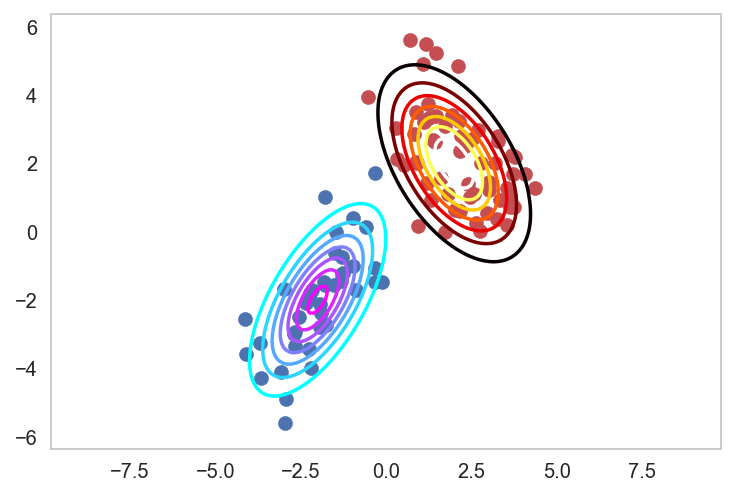

In [3]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [5]:
model_norm.classes_

array([0., 1.])

In [6]:
model_norm.class_count_

array([40., 60.])

In [7]:
model_norm.class_prior_

array([0.4, 0.6])

In [8]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [9]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

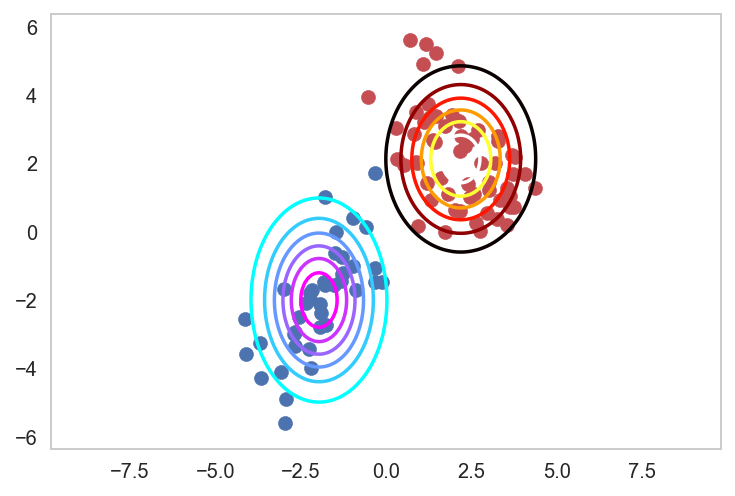

In [10]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [11]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

In [12]:
likelihood = [sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
              sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

In [13]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

In [14]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
X = iris.data
y = iris.target

In [17]:
iris_model = GaussianNB().fit(X, y)

In [18]:
iris_model.classes_

array([0, 1, 2])

In [19]:
iris_model.class_count_

array([50., 50., 50.])

In [20]:
iris_model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [21]:
iris_model.theta_[0], iris_model.sigma_[0]

(array([5.006, 3.418, 1.464, 0.244]),
 array([0.121764, 0.142276, 0.029504, 0.011264]))

In [22]:
iris_model.theta_[1], iris_model.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [23]:
iris_model.theta_[2], iris_model.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [24]:
from sklearn.metrics import *

In [30]:
y_pred = iris_model.predict_proba(X)
y_pred

array([[1.00000000e+000, 1.38496103e-018, 7.25489025e-026],
       [1.00000000e+000, 1.48206242e-017, 2.29743996e-025],
       [1.00000000e+000, 1.07780639e-018, 2.35065917e-026],
       [1.00000000e+000, 1.43871443e-017, 2.89954283e-025],
       [1.00000000e+000, 4.65192224e-019, 2.95961100e-026],
       [1.00000000e+000, 1.52598944e-014, 1.79883402e-021],
       [1.00000000e+000, 1.13555084e-017, 2.79240943e-025],
       [1.00000000e+000, 6.57615274e-018, 2.79021029e-025],
       [1.00000000e+000, 9.12219356e-018, 1.16607332e-025],
       [1.00000000e+000, 3.20344249e-018, 1.12989524e-025],
       [1.00000000e+000, 4.48944985e-018, 5.19388089e-025],
       [1.00000000e+000, 1.65734172e-017, 7.24605453e-025],
       [1.00000000e+000, 1.19023891e-018, 3.06690017e-026],
       [1.00000000e+000, 7.39520546e-020, 1.77972179e-027],
       [1.00000000e+000, 2.58242749e-019, 8.73399972e-026],
       [1.00000000e+000, 3.17746623e-017, 1.73684833e-023],
       [1.00000000e+000, 5.70113578e-017

In [31]:
sk.metrics.confusion_matrix(y, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [139]:
sk.metrics.classification_report(y, y_pred)

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous-multioutput'}

In [93]:
import scikitplot

In [94]:
from scikitplot.metrics import *

In [123]:
scikitplot.metrics.auc(y, y_pred)

ValueError: bad input shape (150, 3)

In [121]:
scikitplot.metrics.roc_curve(y, y_pred)

ValueError: multiclass format is not supported


### 연습 문제 2
- MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.
- BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.
계산된 모형의 모수 벡터 값을 각 클래스별로 8*8 이미지의 형태로 나타낸다. 이 이미지는 무엇을 뜻하는가?